In [ ]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

h5ad_data = []
for file in glob.glob("*.h5ad"):  
    h5ad_data.append(file)  #All names of file with #.h5ad 

adata_file_name = h5ad_data  


In [2]:
h5ad_data

['RNA-a732a72e79-CD45.h5ad',
 'RNA-a3bb0a02a9-Stroma.h5ad',
 'RNA-6afc2254f6-Tumor.h5ad',
 'RNA-f6514792ee-StromaCD45.h5ad',
 'RNA-9e05a910a0-Tumor.h5ad',
 'RNA-75bb7b7378-CD45.h5ad',
 'RNA-5beb60a390-Stroma.h5ad',
 'RNA-e3f3a05da7-Tumor.h5ad',
 'RNA-5beb60a390-Tumor.h5ad',
 'RNA-90f7522850-Tumor.h5ad',
 'RNA-b15339dae6-Tumor.h5ad',
 'RNA-e3f3a05da7-Stroma.h5ad',
 'RNA-75bb7b7378-Tumor.h5ad',
 'RNA-26c87cf199-Stroma.h5ad',
 'RNA-5e57cbf4e3-CD45.h5ad',
 'RNA-e5bcb3c95a-Tumor.h5ad',
 'RNA-05c133f08b-Stroma.h5ad',
 'RNA-26c87cf199-Tumor.h5ad',
 'RNA-f6514792ee-Tumor.h5ad',
 'RNA-5e57cbf4e3-Tumor.h5ad',
 'RNA-5beb60a390-CD45.h5ad',
 'RNA-e5bcb3c95a-StromaCD45.h5ad',
 'RNA-a732a72e79-Stroma.h5ad',
 'RNA-a3bb0a02a9-Tumor.h5ad',
 'RNA-15a334b60a-CD45.h5ad',
 'RNA-fbd6bc90f1-CD45.h5ad',
 'RNA-15a334b60a-Tumor.h5ad',
 'RNA-b15339dae6-StromaCD45.h5ad',
 'RNA-a3bb0a02a9-CD45.h5ad',
 'RNA-5e57cbf4e3-Stroma.h5ad',
 'RNA-6afc2254f6-CD45.h5ad',
 'RNA-6afc2254f6-Stroma.h5ad',
 'RNA-26c87cf199-CD45.h5a

In [4]:
n_data = len(adata_file_name)

adata_list = []


for i in range(n_data):
  
    print(i)    
    data_loaded = sc.read_h5ad(adata_file_name[i])
    data_loaded_transposed = data_loaded.transpose()
    
    adata_list.append(data_loaded_transposed)  #이곳에 데이터가 List 로 저장됨 

    
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [5]:
for adata in adata_list:
    adata.var_names_make_unique()

In [9]:
adata_list[0]

AnnData object with n_obs × n_vars = 2824 × 22012

In [10]:
i = 0

In [11]:
adata_list[i]

AnnData object with n_obs × n_vars = 2824 × 22012

In [12]:
adata_file_name[i]

'RNA-a732a72e79-CD45.h5ad'

In [18]:
adata_list[0].obs['type'] = 'CD45'
adata_list[0].obs['sample'] = 'CD45-1'

adata_list[1].obs['type'] = 'Stroma'
adata_list[1].obs['sample'] = 'Stroma-1'

adata_list[2].obs['type'] = 'Tumor'
adata_list[2].obs['sample'] = 'Tumor-1'

adata_list[3].obs['type'] = 'StromaCD45'
adata_list[3].obs['sample'] = 'StromaCD45-1'

adata_list[4].obs['type'] = 'Tumor'
adata_list[4].obs['sample'] = 'Tumor-2'


파일이 너무 많아서 우선 5개의 sample 만 이름을 입력하도록 한다. 

In [20]:
adata = adata_list[0].concatenate(adata_list[1], adata_list[2], adata_list[3], adata_list[4], adata_list[5],
                                  adata_list[6], adata_list[7], adata_list[8], adata_list[9], adata_list[10],
                                  adata_list[11], adata_list[12], adata_list[13], adata_list[14], adata_list[15],
                                  adata_list[16], adata_list[17], adata_list[18], adata_list[19], adata_list[20],
                                  adata_list[21], adata_list[22], adata_list[23], adata_list[24], adata_list[25],
                                  adata_list[26], adata_list[27], adata_list[28], adata_list[29], adata_list[30],
                                  adata_list[31], adata_list[32], adata_list[33], adata_list[34], adata_list[35])
                                  
                                  
                                

In [21]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch'

In [22]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)


In [23]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=5)

print(adata.n_obs, adata.n_vars)


79855 10085


/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'type' as categorical
/home/ubuntu/pyenv/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical


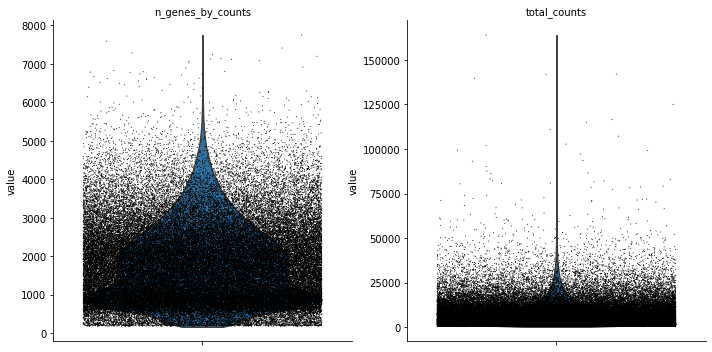

In [24]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True, groupby = 'sample')

sample 당 개별적으로 plot 을 보고 pp 를 할 필요가 있다. 

In [25]:
# save normalized counts in raw slot.
adata.raw = adata


In [26]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [27]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:06): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [28]:
sc.pp.log1p(adata)

In [29]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [30]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing PCA
    with n_comps=50
    finished (0:00:31)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:52)


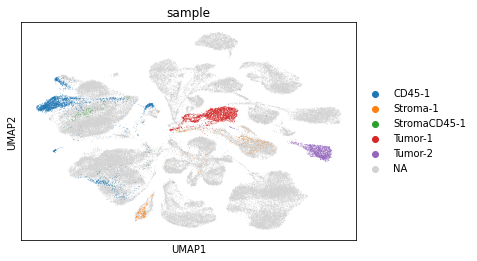

In [31]:
sc.pl.umap(adata, color=['sample'])


In [32]:
adata = adata.raw.to_adata() 


In [33]:
print(adata.shape)


(79855, 10085)


In [34]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'

In [35]:
save_file = 'data/results/qc_tutorial_1.h5ad'
adata.write_h5ad(save_file)

## Tutorial 2

In [2]:
#from load_raw_data import *
from matplotlib.pyplot import rc_context
#from data_load_19 import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import anndata
import scanpy as sc

In [3]:
adata = sc.read_h5ad('data/results/qc_tutorial_1.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [5]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize|
sc.pp.log1p(adata)

In [6]:
adata.raw = adata


In [7]:
adata

AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca', 'sample_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'

Highly variable genes: 2118


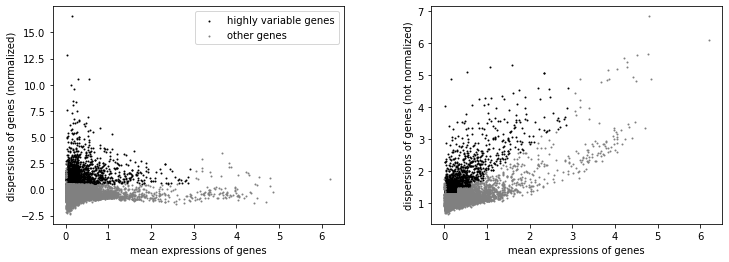

In [8]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [9]:
# adata = adata.copy()     #run this line if you get the "AttributeError: swapaxes not found" 


# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

/home/ubuntu/pyenv/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sc.tl.pca(adata, svd_solver='arpack')

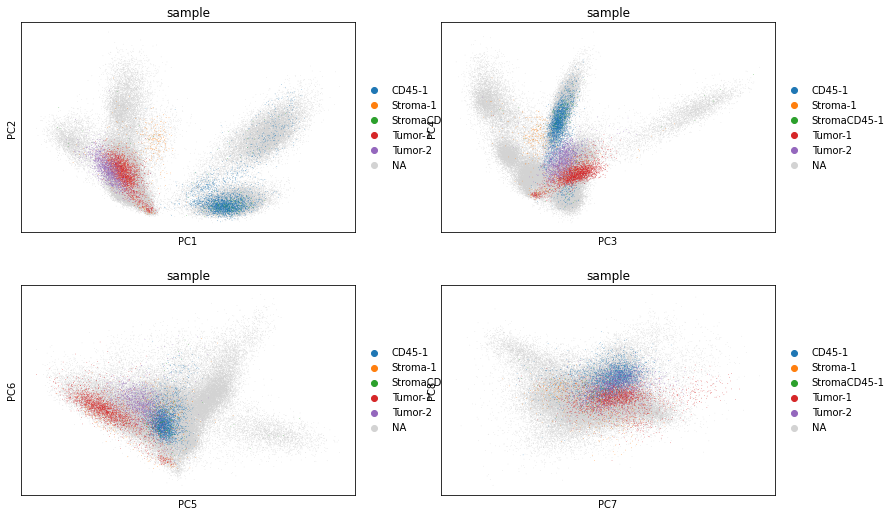

In [12]:
sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

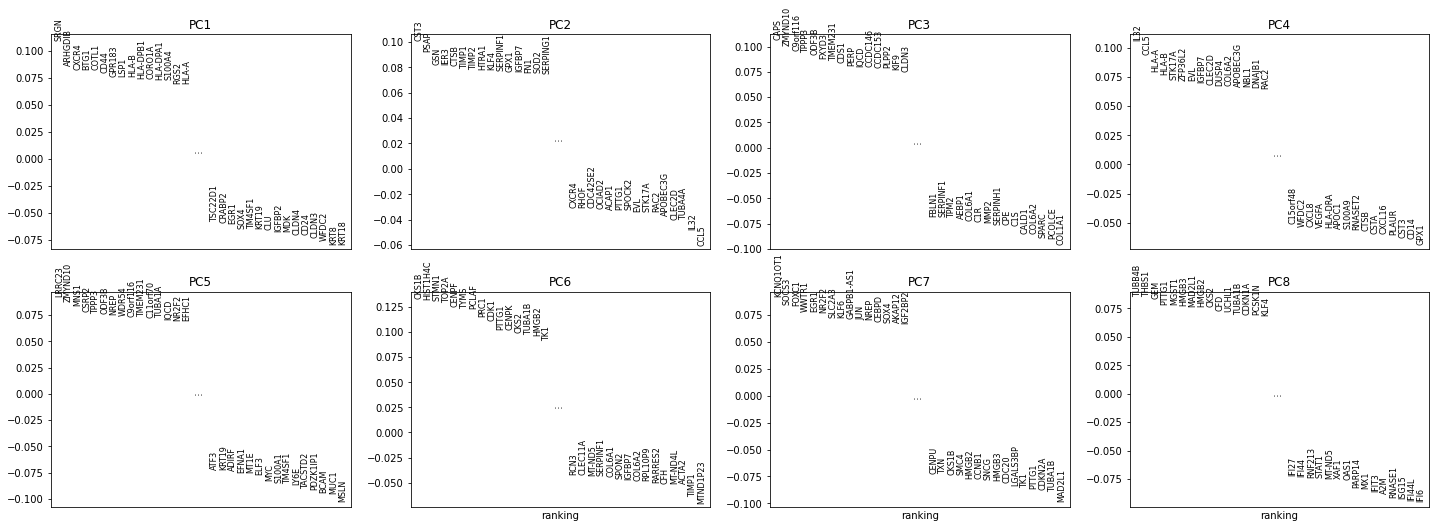

In [13]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

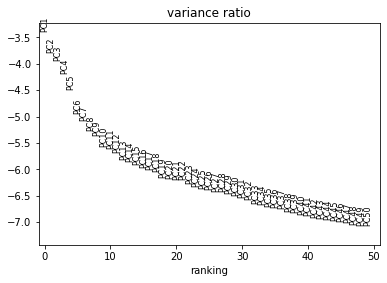

In [14]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


In [16]:
sc.tl.tsne(adata, n_pcs = 30)

/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


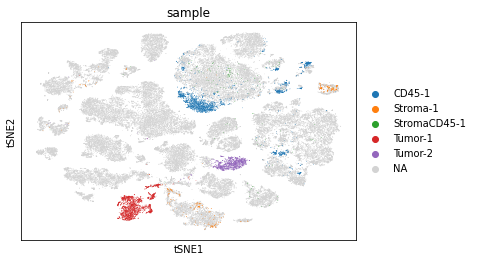

In [17]:
sc.pl.tsne(adata, color='sample')


In [19]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)

In [20]:
sc.tl.umap(adata)

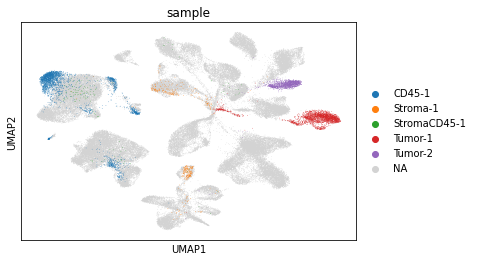

In [21]:
sc.pl.umap(adata, color='sample')

batch effect 를 확인하기 위해서는 전부 sample id 를 입력해서 확인해보는 것이 좋을 것 같다. 